**Step 1: Import Required Libraries**

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plots for Jupyter Notebook
# %matplotlib inline

# Set Seaborn Style for better visuals
sns.set(style="whitegrid")

**Step 2: Load Dataset**

In [ ]:
# Load Amazon Sales Dataset
df = pd.read_csv('/content/Amazon Sale Report - Amazon Sale Report.csv.csv')

**Step 3: Initial Data Exploration**

In [ ]:
# Display first 5 rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [ ]:
# Check the data shape
df.shape

(128976, 19)

In [ ]:
# Check Data Types & Null Values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [ ]:
# Summary Statistics
df.describe()

,index,Qty,Amount,ship-postal-code
count,128976.000000,128976.000000,121176.000000,128941.000000
mean,64486.130427,0.904401,648.562176,463945.677744
std,37232.897832,0.313368,281.185041,191458.488954
min,0.000000,0.000000,0.000000,110001.000000
25%,32242.750000,1.000000,449.000000,382421.000000
50%,64486.500000,1.000000,605.000000,500033.000000
75%,96730.250000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


**Step 4: Data Cleaning**

In [ ]:
# Drop completely empty columns
# df.drop(["New", "PendingS"], axis=1, inplace=True)

In [ ]:
# Check for null values
df.isnull().sum()


,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [ ]:
# Fill or drop missing values
df.dropna(inplace=True)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Converting Data Types
df['ship-postal-code'] = df['ship-postal-code'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-122-67f55447f6d5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Check the data shape
df.shape

(37464, 19)

In [ ]:
# Check Data Types & Null Values after cleaning the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37464 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37464 non-null  int64         
 1   Order ID            37464 non-null  object        
 2   Date                37464 non-null  datetime64[ns]
 3   Status              37464 non-null  object        
 4   Fulfilment          37464 non-null  object        
 5   Sales Channel       37464 non-null  object        
 6   ship-service-level  37464 non-null  object        
 7   Category            37464 non-null  object        
 8   Size                37464 non-null  object        
 9   Courier Status      37464 non-null  object        
 10  Qty                 37464 non-null  int64         
 11  currency            37464 non-null  object        
 12  Amount              37464 non-null  float64       
 13  ship-city           37464 non-null  object        

**Step 5: Univariate Analysis**

In [ ]:
# Checking Distribution of Size
print(df['Size'].value_counts())

Size
M       6797
L       6639
XL      6320
XXL     5081
S       4551
3XL     4532
XS      2578
Free     554
6XL      189
5XL      119
4XL      104
Name: count, dtype: int64


**Step 6: Exploratory Data Analysis (EDA)**

**Data Visualization**

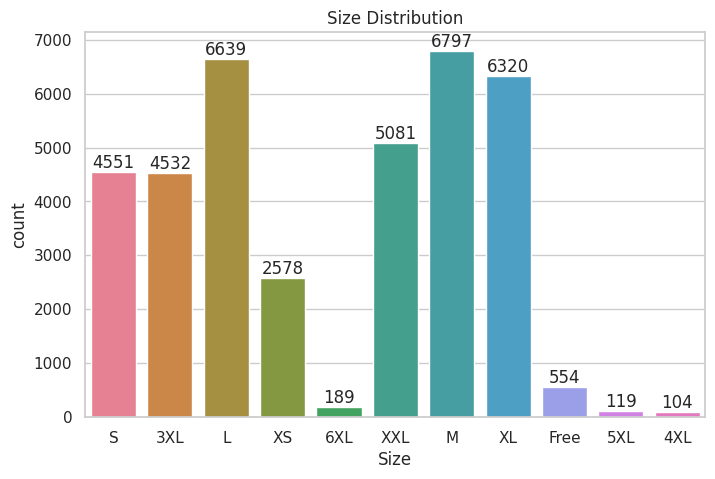

In [ ]:
# Size Distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Size', hue='Size', data=df)

# Add data labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Size Distribution")
plt.show()


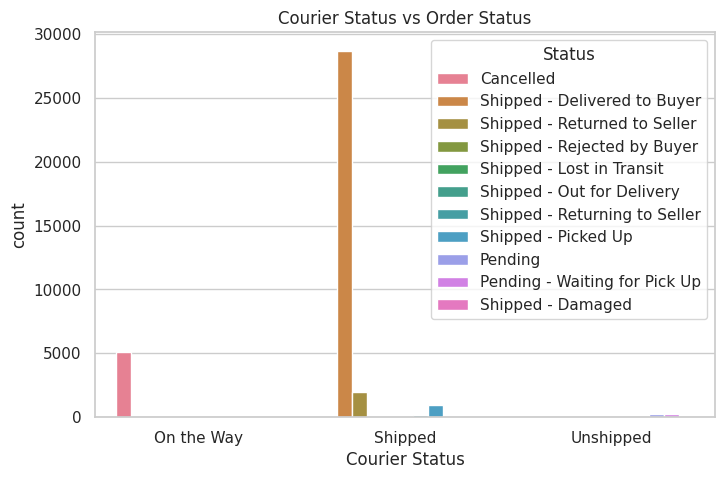

In [ ]:
# Courier Status vs Order Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Courier Status', hue='Status', data=df)
plt.title("Courier Status vs Order Status")
plt.show()

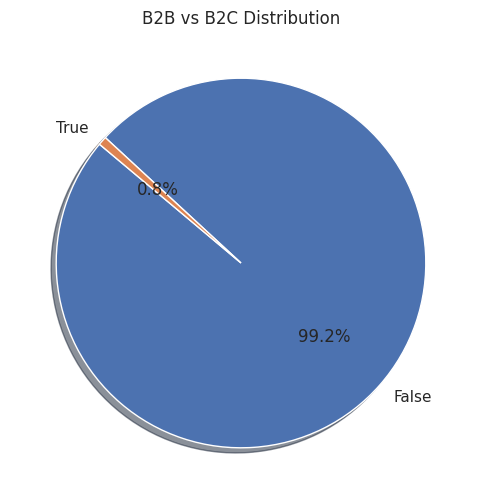

In [ ]:
# Pie Chart of B2B vs B2C Orders
b2b_counts = df['B2B'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(b2b_counts, labels=b2b_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("B2B vs B2C Distribution")
plt.show()

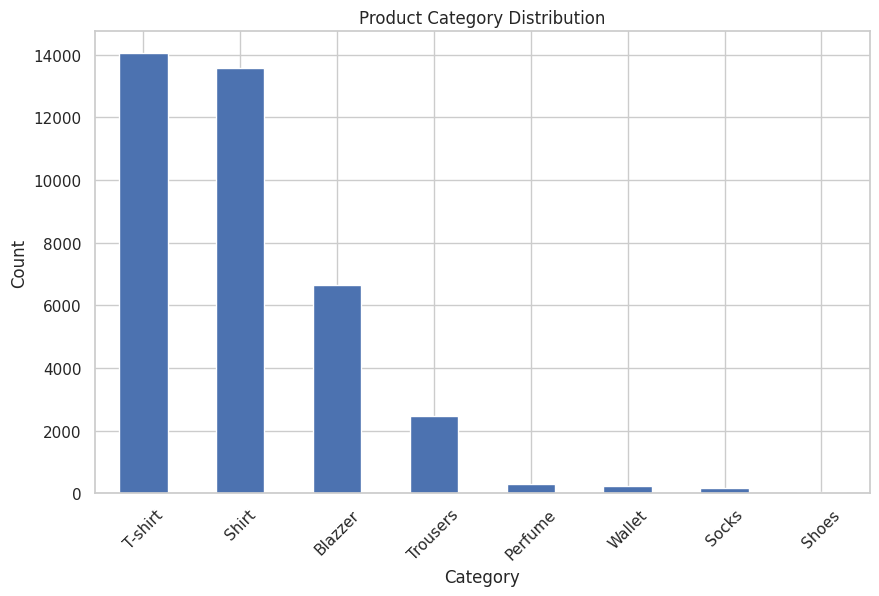

In [ ]:
# Product Category Distribution
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar')
plt.title("Product Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

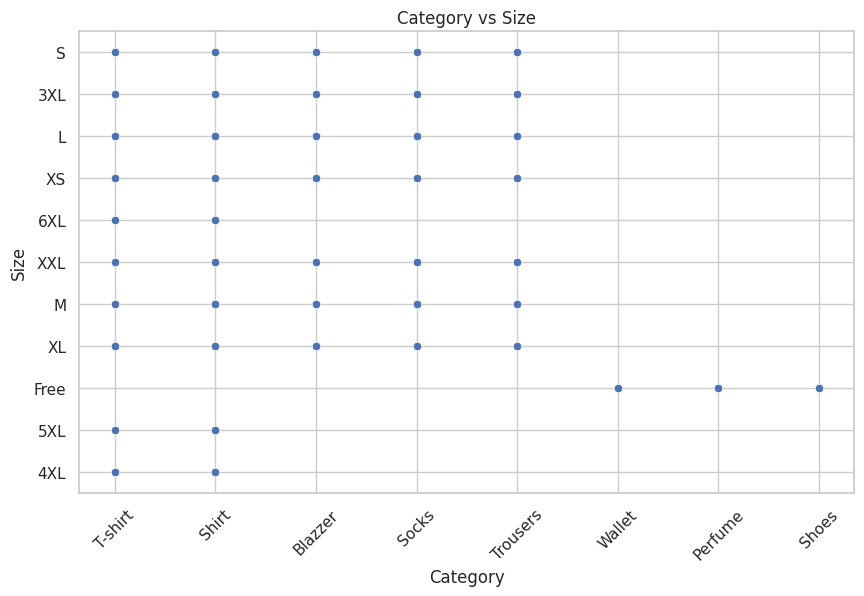

In [ ]:
# Scatter Plot: Category vs Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Category', y='Size', data=df)
plt.title("Category vs Size")
plt.xticks(rotation=45)
plt.show()

**Step 7: Business Insights Generation**

In [ ]:
# Most Selling Size
most_selling_size = df['Size'].mode()[0]
print("Most Selling Size:", most_selling_size)

Most Selling Size: M


In [ ]:
# Most Sold Product Category
most_sold_category = df['Category'].mode()[0]
print("Most Sold Category:", most_sold_category)

Most Sold Category: T-shirt


In [ ]:
# B2B vs B2C Percentage
b2b_percentage = (df['B2B'].value_counts(normalize=True) * 100)
print("B2B/B2C Percentage:\n", b2b_percentage)

B2B/B2C Percentage:
 B2B
False    99.23927
True      0.76073
Name: proportion, dtype: float64


**Step 8: Advanced Analysis**

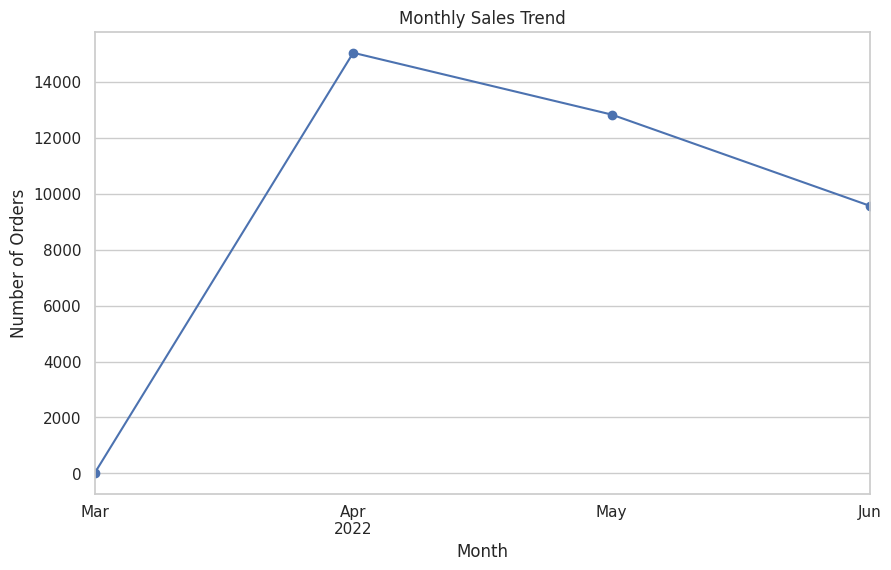

In [ ]:
# Monthly Sales Trend
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month').size()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

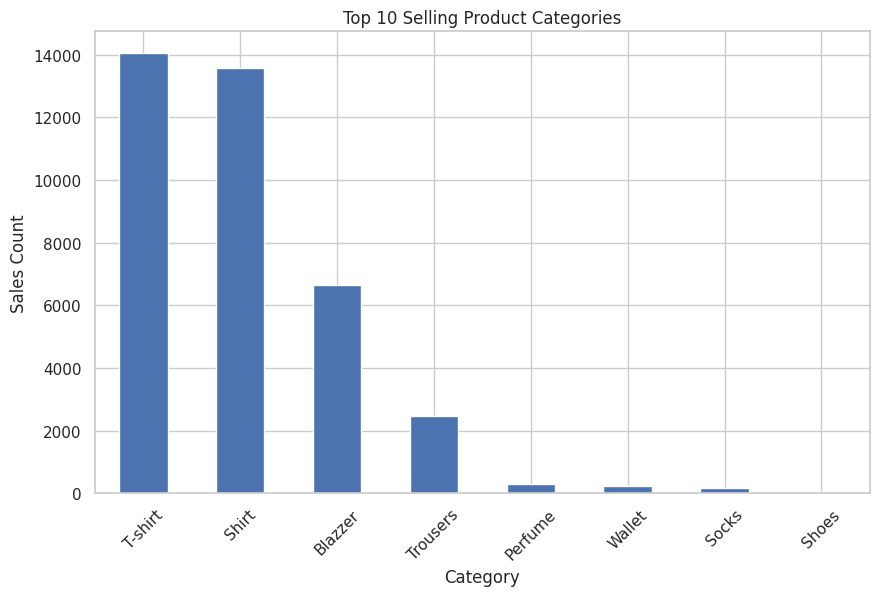

In [ ]:
# Top 10 Selling Categories
top_categories = df['Category'].value_counts().head(10)
top_categories.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Selling Product Categories")
plt.xlabel("Category")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()

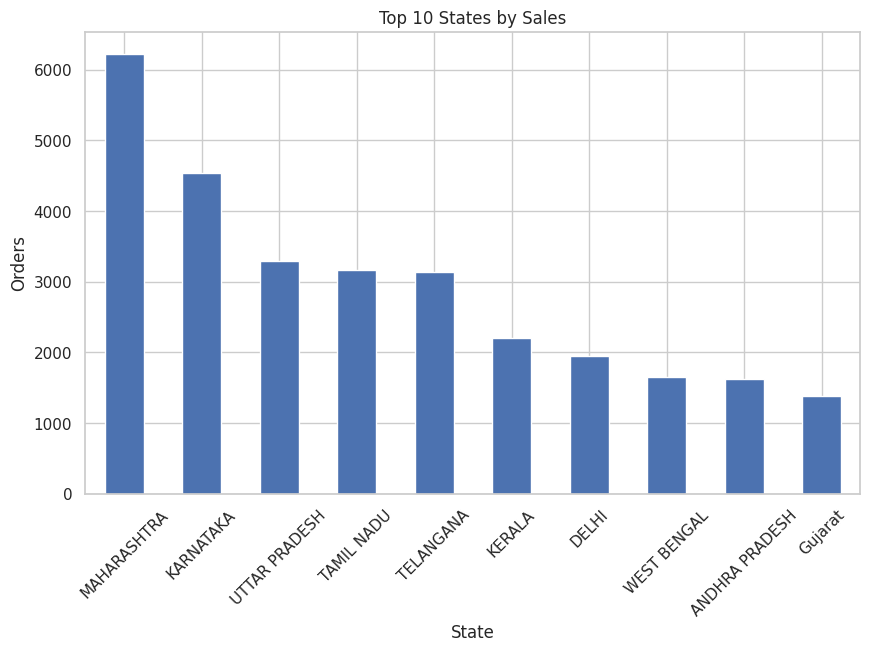

In [ ]:
# Top 10 States by Sales
state_sales = df['ship-state'].value_counts().head(10)
state_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 States by Sales")
plt.xlabel("State")
plt.ylabel("Orders")
plt.xticks(rotation=45)
plt.show()

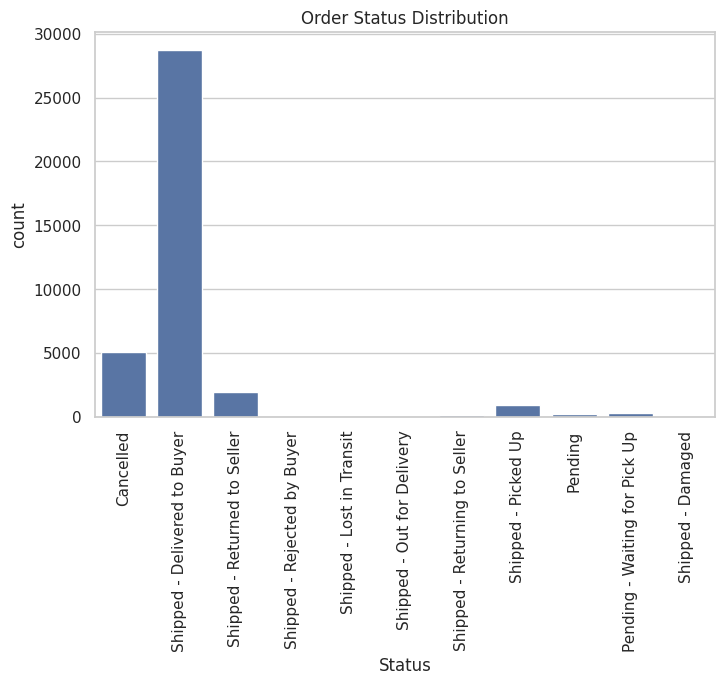

In [ ]:
# Order Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Status', data=df)
plt.title("Order Status Distribution")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Step 9: Business Insights Summary
print("""
Insights:
- Focus on stocking M-size T-shirts
- Target high-sale states with offers
- Improve logistics to reduce canceled/delayed orders
- 99% customers are Retail (B2C) - target them more
""")


Insights:
- Focus on stocking M-size T-shirts
- Target high-sale states with offers
- Improve logistics to reduce canceled/delayed orders
- 99% customers are Retail (B2C) - target them more

